# Introduction

This notebook performs exploratory data analysis on the raw data. 

# Imports 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from src.visualize import plot_missing_data, univ_dist, biv_dist, plot_corr_matrix

# Load Raw Data

In [2]:
df = pd.read_csv('../data/raw/companies.csv')
df.shape

(7683, 44)

In [3]:
df.head()

,cik,AccountsPayableCurrent_USD,AccumulatedOtherComprehensiveIncomeLossNetOfTax_USD,AdditionalPaidInCapital_USD,AssetsCurrent_USD,Assets_USD,CashAndCashEquivalentsAtCarryingValue_USD,CashAndCashEquivalentsPeriodIncreaseDecrease_USD,CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect_USD,CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents_USD,...,ProceedsFromIssuanceOfCommonStock_USD,ProfitLoss_USD,PropertyPlantAndEquipmentNet_USD,RetainedEarningsAccumulatedDeficit_USD,ShareBasedCompensation_USD,StockIssuedDuringPeriodValueNewIssues_USD,StockholdersEquity_USD,UnrecognizedTaxBenefits_USD,WeightedAverageNumberOfDilutedSharesOutstanding_shares,WeightedAverageNumberOfSharesOutstandingBasic_shares
0,1750,198300000.0,-4.300000e+07,NaN,1.041700e+09,1.669300e+09,1.100000e+08,NaN,NaN,NaN,...,NaN,NaN,1.250000e+08,6.996000e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,1800,NaN,-8.946000e+09,NaN,2.044100e+10,7.254800e+10,6.838000e+09,NaN,NaN,6.838000e+09,...,NaN,NaN,9.029000e+09,2.762700e+10,NaN,NaN,3.278400e+10,1.210000e+09,NaN,NaN
2,1961,981898.0,NaN,41240880.0,4.745870e+05,6.918540e+05,4.745870e+05,NaN,NaN,NaN,...,NaN,NaN,NaN,4.517450e+07,NaN,NaN,-2.669888e+06,NaN,NaN,NaN
3,2098,7601123.0,-8.259670e+05,7930673.0,8.368591e+07,1.298677e+08,4.167376e+06,NaN,NaN,4.167000e+06,...,NaN,NaN,2.023891e+07,5.803325e+07,NaN,NaN,6.271700e+07,NaN,NaN,NaN
4,2178,85991000.0,NaN,13340000.0,1.875130e+08,2.961870e+08,3.929300e+07,NaN,NaN,5.206500e+07,...,NaN,NaN,9.413400e+07,1.353290e+08,NaN,NaN,1.490920e+08,NaN,NaN,NaN


# Split Data

Split the data before exploring it to minimize the risk of overfitting. 

In [4]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print("""
  Training Data: {0} 
  Testing Data: {1}
""".format(df_train.shape, df_test.shape))


  Training Data: (6146, 44) 
  Testing Data: (1537, 44)



# Missing Data 

Check for missing data. 

In [5]:
df_train.isna().sum() / len(df_train)

cik                                                                                                                   0.000000
AccountsPayableCurrent_USD                                                                                            0.444191
AccumulatedOtherComprehensiveIncomeLossNetOfTax_USD                                                                   0.473316
AdditionalPaidInCapital_USD                                                                                           0.487309
AssetsCurrent_USD                                                                                                     0.274650
Assets_USD                                                                                                            0.108851
CashAndCashEquivalentsAtCarryingValue_USD                                                                             0.196876
CashAndCashEquivalentsPeriodIncreaseDecrease_USD                                                               

There appears to be quite a bit of data missing. Let's visualize it to get a more intuitive understanding. 

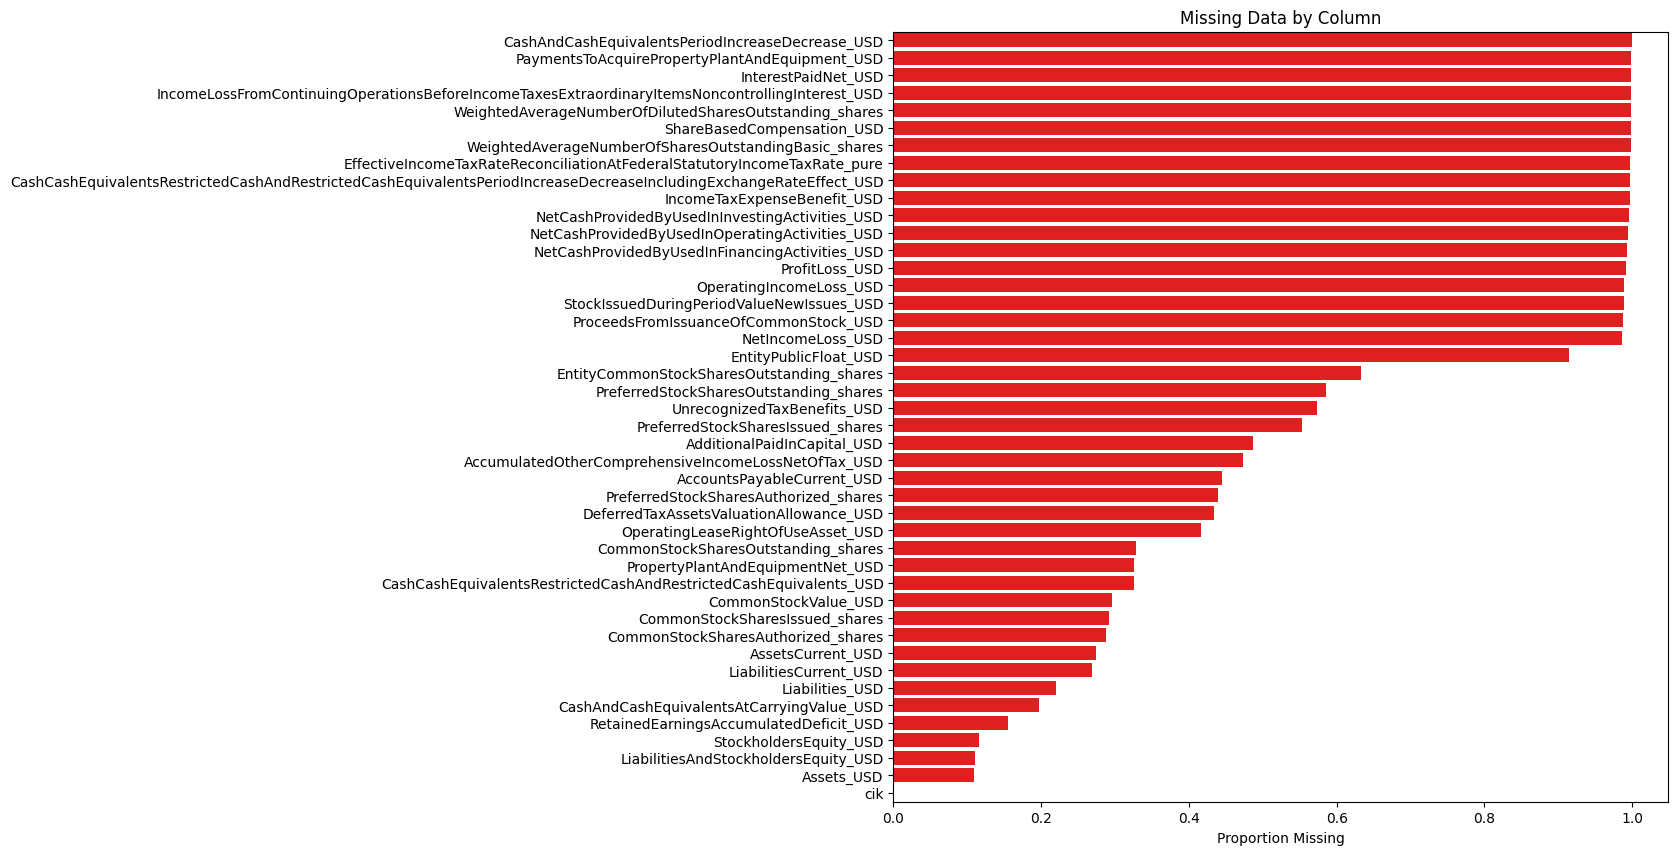

In [6]:
plot_missing_data(df_train, figsize=(10, 10))

Let's only keep the columns missing less than a given percentage threshold of their values. 

In [7]:
missing_data_threshold = 0.3
cols_to_keep = df_train.columns[df_train.isna().sum() / len(df_train) < missing_data_threshold]
cols_to_keep

Index(['cik', 'AssetsCurrent_USD', 'Assets_USD',
       'CashAndCashEquivalentsAtCarryingValue_USD',
       'CommonStockSharesAuthorized_shares', 'CommonStockSharesIssued_shares',
       'CommonStockValue_USD', 'LiabilitiesAndStockholdersEquity_USD',
       'LiabilitiesCurrent_USD', 'Liabilities_USD',
       'RetainedEarningsAccumulatedDeficit_USD', 'StockholdersEquity_USD'],
      dtype='object')

In [8]:
# filter both datasets 
df_train = df_train[cols_to_keep]
df_test = df_test[cols_to_keep]

In [9]:
df_train.to_csv('../data/interim/train.csv', index=False)
df_test.to_csv('../data/interim/test.csv', index=False)
# delete original and test data sets from memory to avoid peaking 
del df, df_test

In [10]:
print('After removing columns exceeding the threshold, we are left with {0} columns.'.format(len(cols_to_keep)))

After removing columns exceeding the threshold, we are left with 12 columns.


# Univariate Distributions

In [11]:
# define feature matrix 
X_train = df_train[cols_to_keep].drop(columns=['cik']) # CIK is a company identifier

count    4.458000e+03
mean     1.281877e+09
std      6.085459e+09
min      0.000000e+00
25%      4.630914e+06
50%      9.396150e+07
75%      5.586565e+08
max      1.742960e+11
Name: AssetsCurrent_USD, dtype: float64


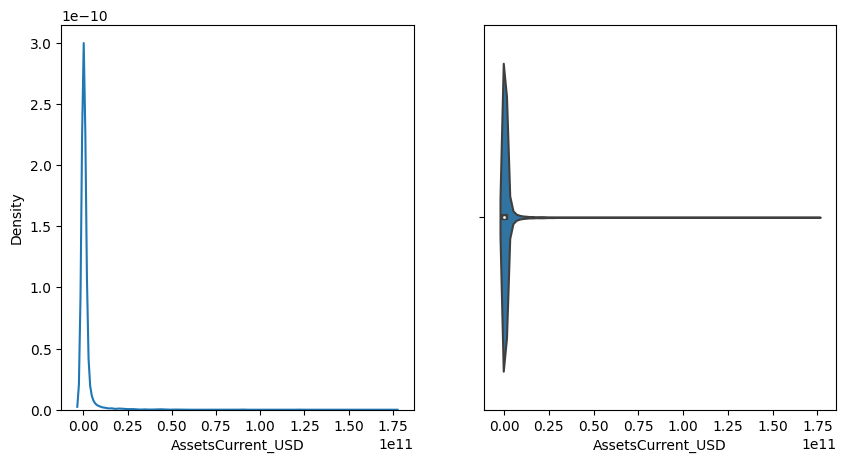

count    5.477000e+03
mean     1.057335e+10
std      1.045193e+11
min      0.000000e+00
25%      2.535278e+07
50%      3.531330e+08
75%      2.484443e+09
max      3.985749e+12
Name: Assets_USD, dtype: float64


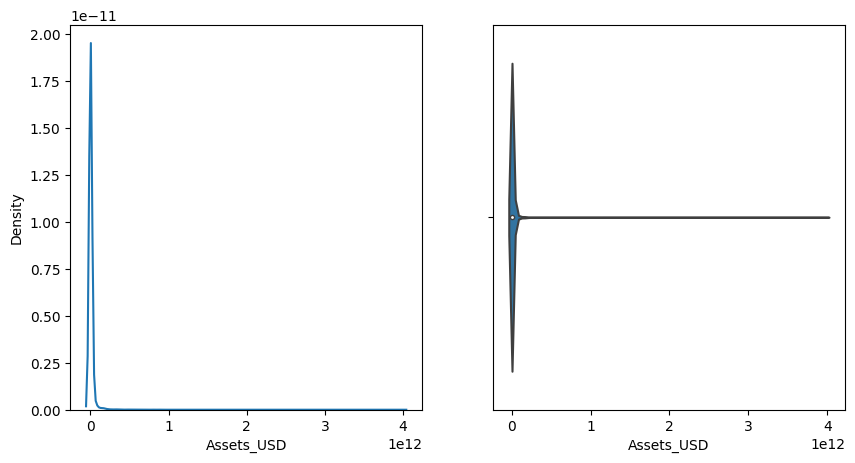

count    4.936000e+03
mean     4.967649e+08
std      3.261716e+09
min     -2.555000e+03
25%      2.281911e+06
50%      3.900838e+07
75%      2.133628e+08
max      1.558420e+11
Name: CashAndCashEquivalentsAtCarryingValue_USD, dtype: float64


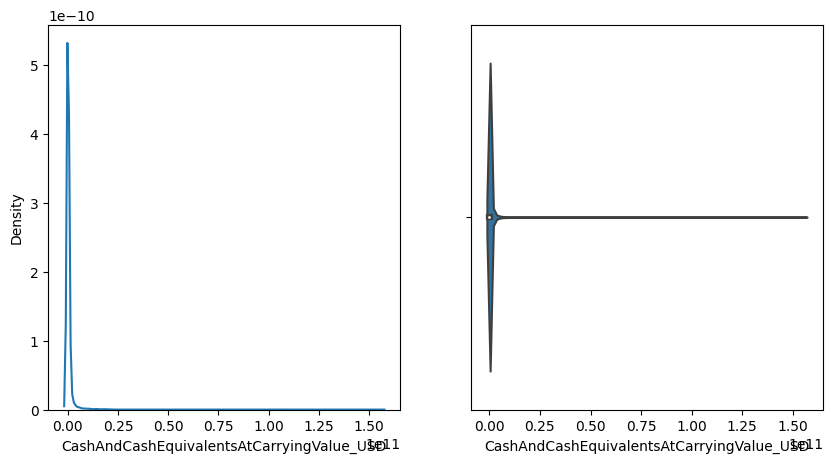

count    4.378000e+03
mean     2.159847e+09
std      4.103146e+10
min      0.000000e+00
25%      7.500000e+07
50%      2.000000e+08
75%      5.000000e+08
max      2.000000e+12
Name: CommonStockSharesAuthorized_shares, dtype: float64


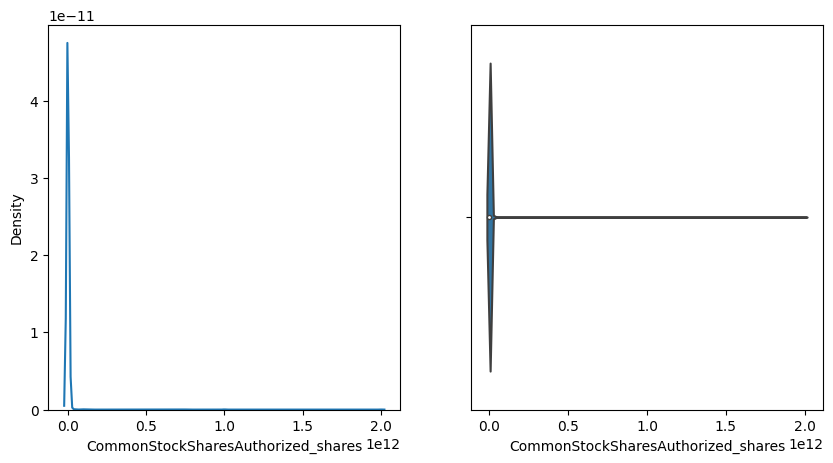

count    4.351000e+03
mean     4.559066e+08
std      1.208971e+10
min      0.000000e+00
25%      1.374580e+07
50%      4.193678e+07
75%      1.101707e+08
max      7.618643e+11
Name: CommonStockSharesIssued_shares, dtype: float64


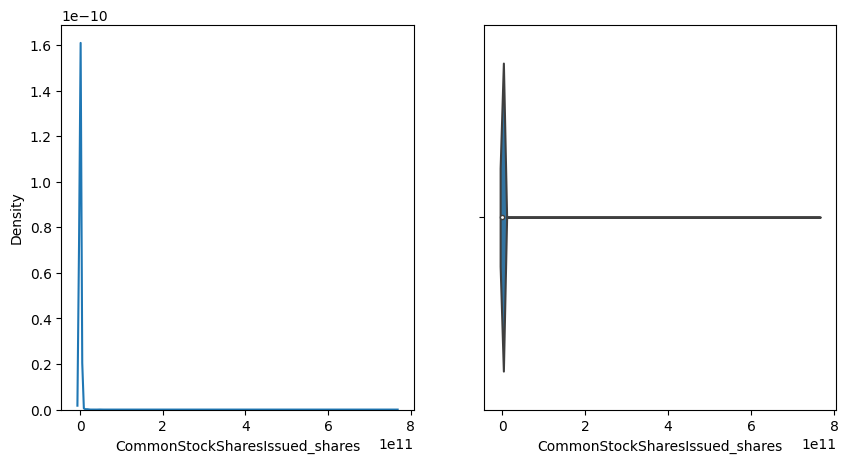

count    4.327000e+03
mean     1.072036e+08
std      1.356786e+09
min      0.000000e+00
25%      7.000000e+03
50%      8.635000e+04
75%      1.181311e+06
max      7.239571e+10
Name: CommonStockValue_USD, dtype: float64


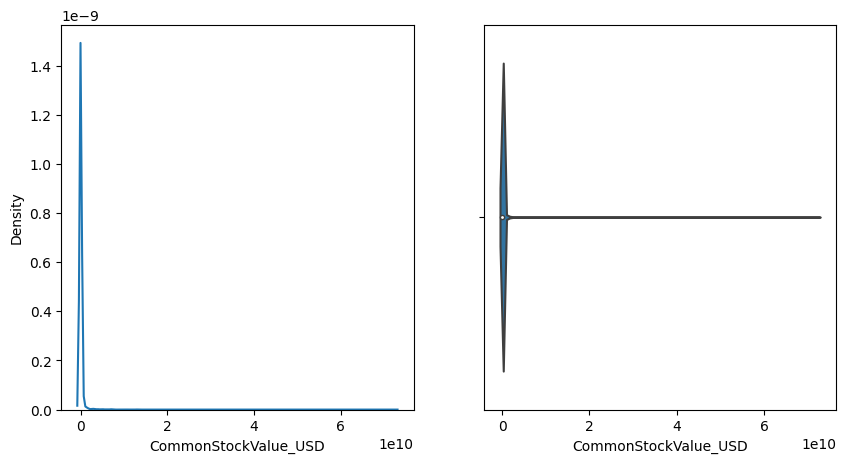

count    5.469000e+03
mean     1.053936e+10
std      1.045895e+11
min     -1.115400e+04
25%      2.422400e+07
50%      3.484530e+08
75%      2.465868e+09
max      3.985749e+12
Name: LiabilitiesAndStockholdersEquity_USD, dtype: float64


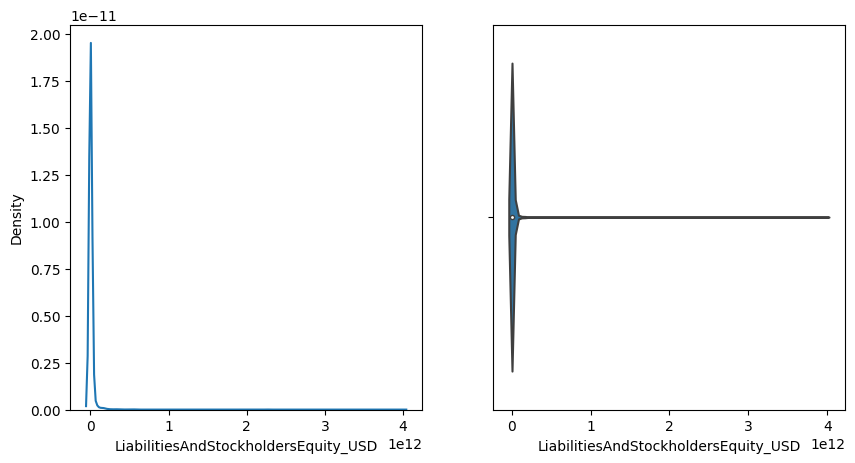

count    4.496000e+03
mean     9.018350e+08
std      4.727189e+09
min      0.000000e+00
25%      3.188600e+06
50%      3.115500e+07
75%      2.717270e+08
max      1.263850e+11
Name: LiabilitiesCurrent_USD, dtype: float64


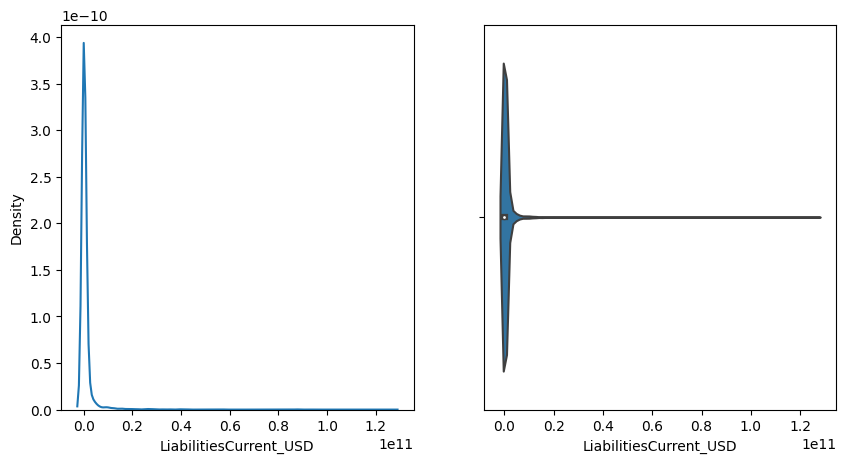

count    4.794000e+03
mean     8.564698e+09
std      1.037408e+11
min     -3.341240e+05
25%      6.943495e+06
50%      1.049885e+08
75%      1.324842e+09
max      3.960490e+12
Name: Liabilities_USD, dtype: float64


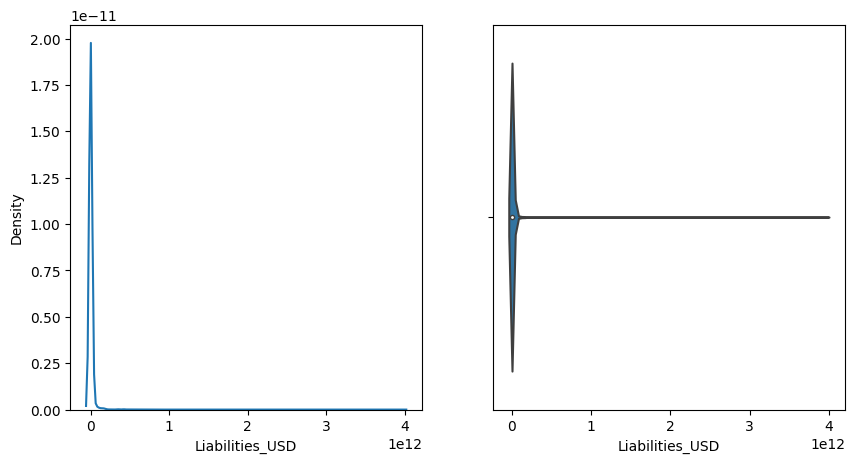

count    5.197000e+03
mean     1.091514e+09
std      1.196045e+10
min     -1.081100e+11
25%     -1.352590e+08
50%     -9.744146e+06
75%      1.072330e+08
max      4.446260e+11
Name: RetainedEarningsAccumulatedDeficit_USD, dtype: float64


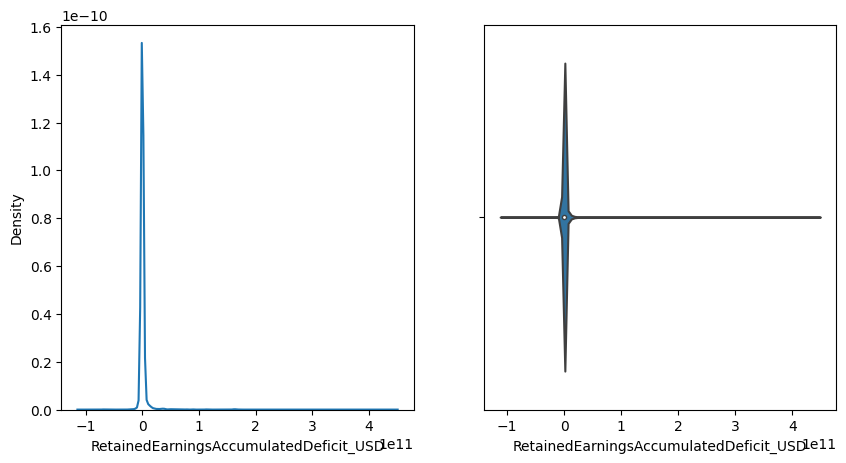

count    5.438000e+03
mean     1.738423e+09
std      1.138382e+10
min     -1.831600e+10
25%      1.909000e+03
50%      7.087250e+07
75%      6.421750e+08
max      4.431640e+11
Name: StockholdersEquity_USD, dtype: float64


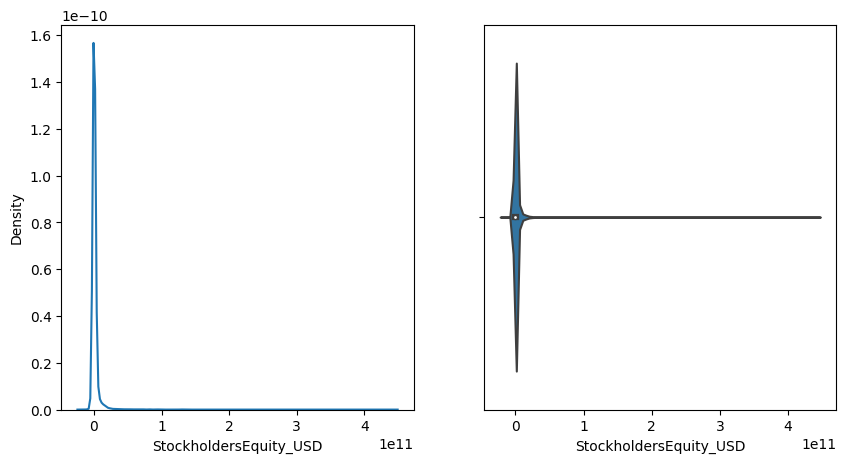

In [12]:
for c in X_train.columns:
    univ_dist(X_train[c], figsize=(10, 5))

All of the distributions are highly skewed, and some contain negative values. This will need to be accounted for in preprocessing. 

# Bivariate Distributions

Let's begin by looking at the correlation matrix. 

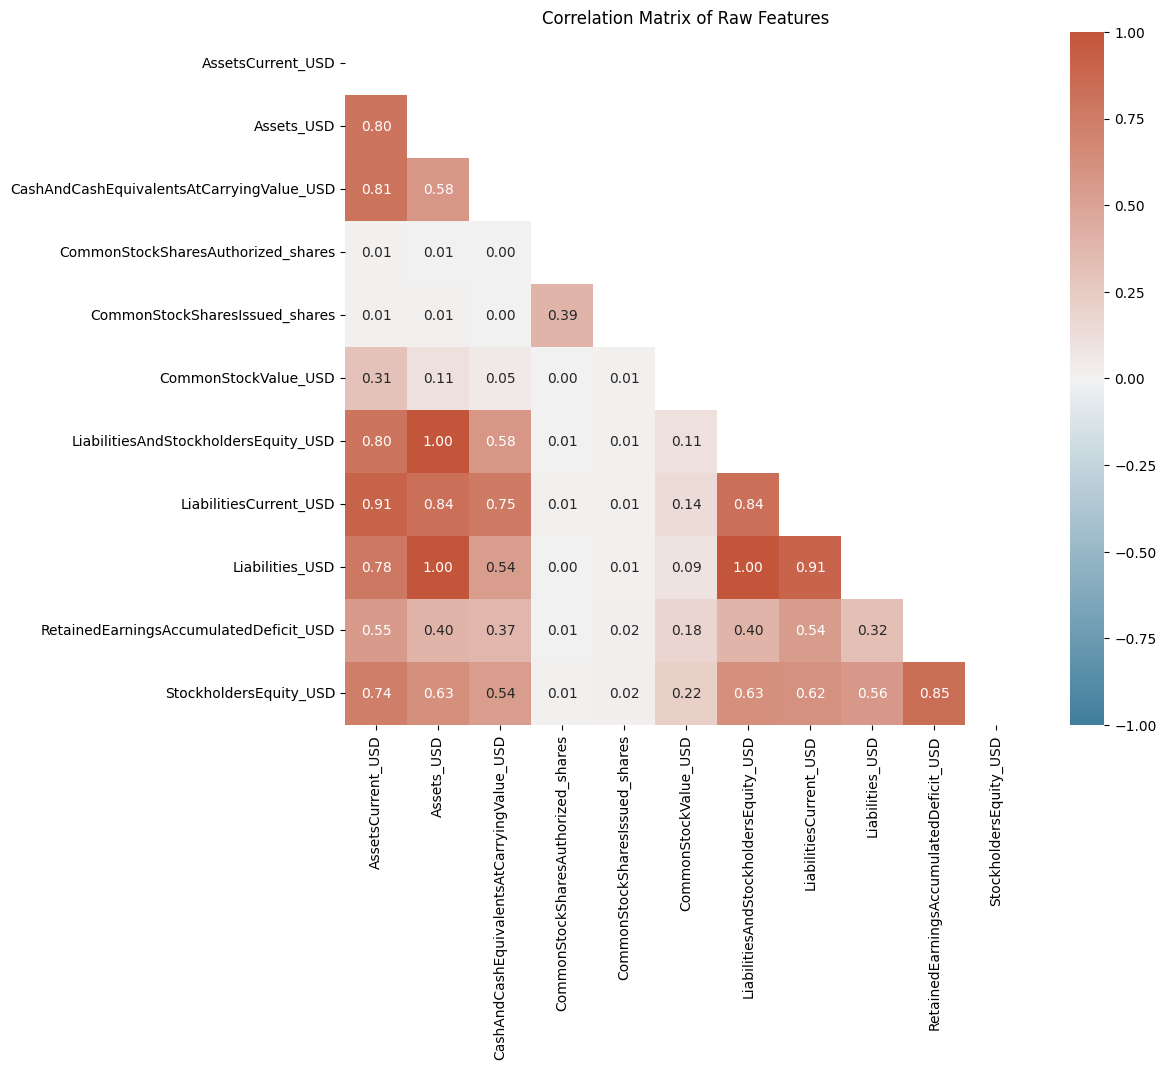

In [13]:
plot_corr_matrix(X_train, 'Correlation Matrix of Raw Features', figsize=(11, 9))

There are some very strong positive correlations among the raw features. Let's take a closer look at those relationships. 

## Balance Sheet: Assets, Liabilities, and Stockholders Equity

Correlation Coefficient: 1.0


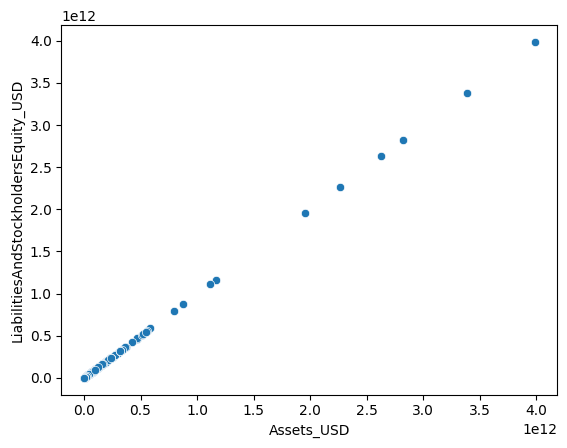

In [14]:
biv_dist(X_train, 'Assets_USD', 'LiabilitiesAndStockholdersEquity_USD')

Assets_USD and LiabilitiesAndStockholdersEquity_USD are perfectly correlated. This is expected by nature of the balance sheet: assets = liabilities + shareholders equity. We should therefore expect Assets_USD and Liabilities_USD to be strongly correlated as well, which we can see below.

Correlation Coefficient: 0.996


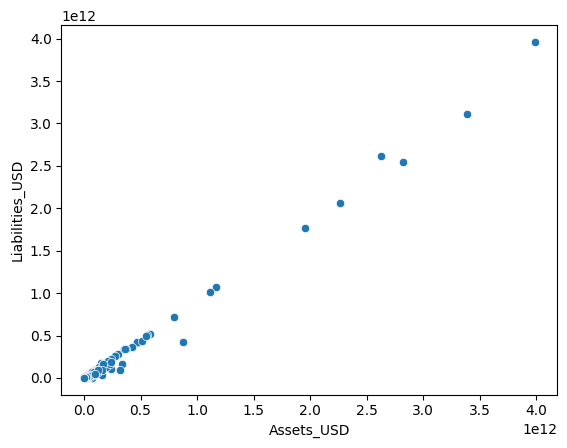

In [15]:
biv_dist(X_train, 'Assets_USD', 'Liabilities_USD')

Correlation Coefficient: 0.996


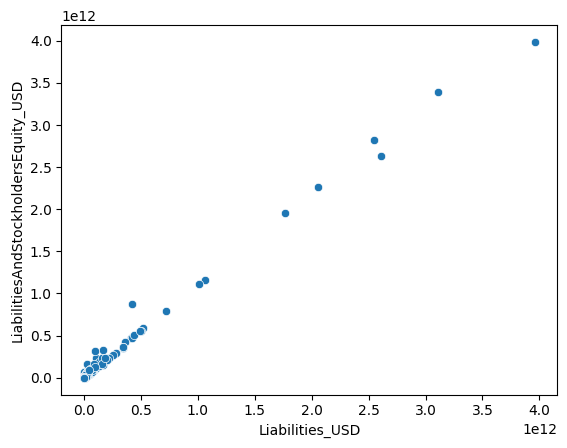

In [16]:
biv_dist(X_train, 'Liabilities_USD', 'LiabilitiesAndStockholdersEquity_USD')

Assets and Liabilities consist of current and non-current components, which are naturally strongly correlated. 

Correlation Coefficient: 0.8


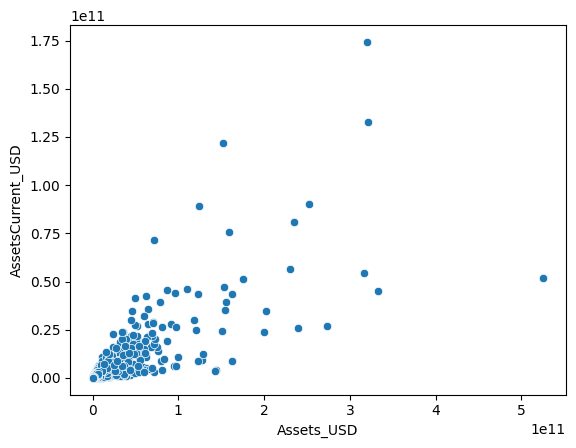

In [17]:
biv_dist(X_train, 'Assets_USD', 'AssetsCurrent_USD')

Correlation Coefficient: 0.905


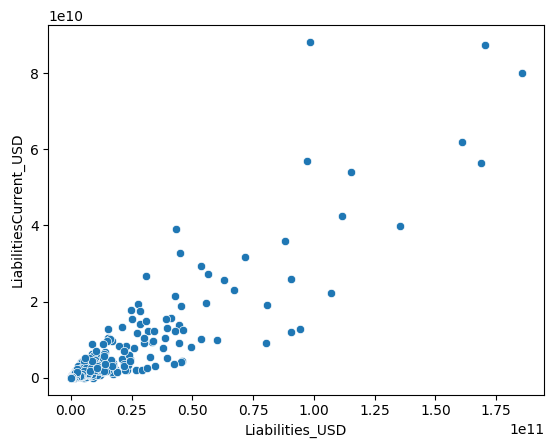

In [18]:
biv_dist(X_train, 'Liabilities_USD', 'LiabilitiesCurrent_USD')

Correlation Coefficient: 0.907


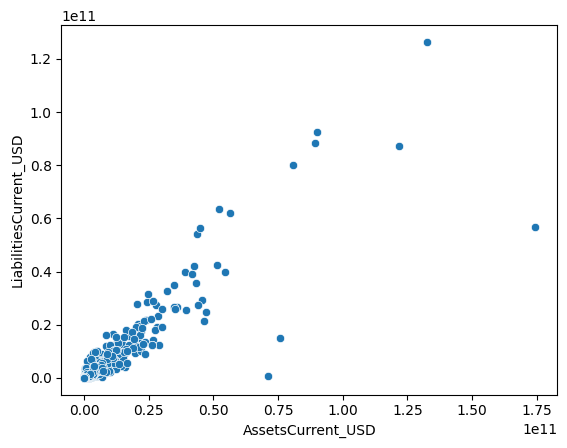

In [19]:
biv_dist(X_train, 'AssetsCurrent_USD', 'LiabilitiesCurrent_USD')

Current Assets are those which can be converted into cash within a year, so CurrentAssets_USD is naturally strongly correlated with CashAndCashEquivalents_USD. 

Correlation Coefficient: 0.81


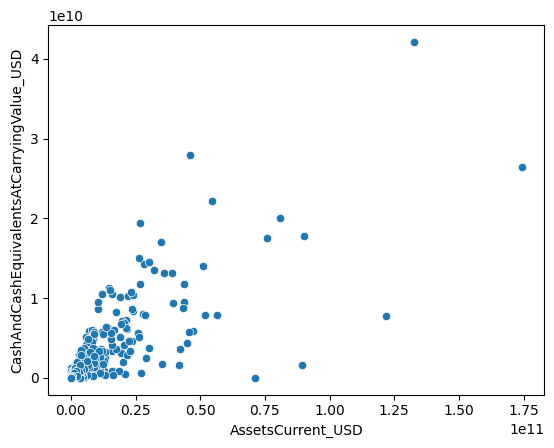

In [20]:
biv_dist(X_train, 'AssetsCurrent_USD', 'CashAndCashEquivalentsAtCarryingValue_USD')

Stockholders Equity is the difference between a company's Assets and its Liabilities. StockholdersEquity_USD is most strongly correlated with RetainedEarningsAccumulatedDeficit_USD. 

Correlation Coefficient: 0.848


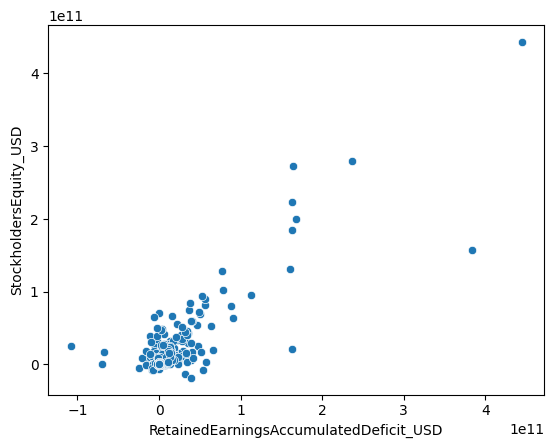

In [21]:
biv_dist(X_train, 'RetainedEarningsAccumulatedDeficit_USD', 'StockholdersEquity_USD')

## Stock: Value and Shares

CommonStockValue_USD is only weakly correlated with other variables, but is most strongly correlated with AssetsCurrent_USD, followed by StockholdersEquity_USD.

Correlation Coefficient: 0.312


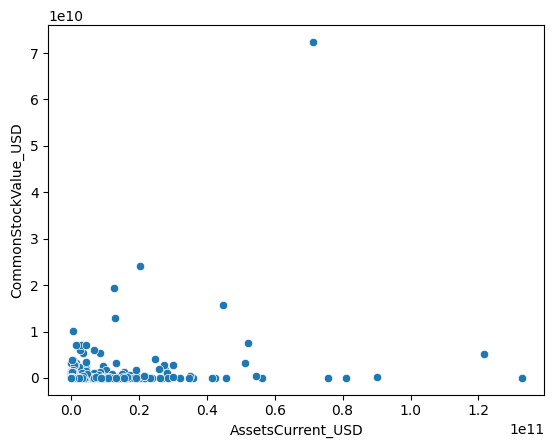

In [22]:
biv_dist(X_train, 'AssetsCurrent_USD', 'CommonStockValue_USD')

Correlation Coefficient: 0.224


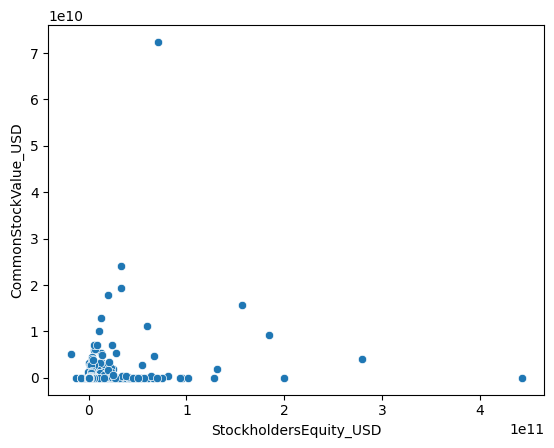

In [23]:
biv_dist(X_train, 'StockholdersEquity_USD', 'CommonStockValue_USD')

CommonStockSharesAuthorized_shares and CommonStockSharesIssued_shares are only correlated with each other, and only to a moderate degree.

Correlation Coefficient: 0.394


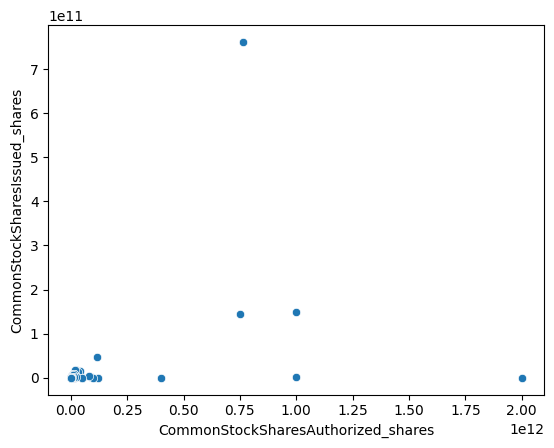

In [24]:
biv_dist(X_train, 'CommonStockSharesAuthorized_shares', 'CommonStockSharesIssued_shares')